# Probability Course Project

**MohammadMoein Arabi**

Modeling the lifetime of nodes in a network using distributions and random reliability.

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma, factorial, comb
from scipy.stats import pareto, expon, levy, lognorm, gamma as gamma_dist, invgauss, weibull_min as weibull
from scipy import integrate

## Define Some Functions

<div dir="rtl">
در این قسمت چندتا از فرمول‌ها و قضیایا به صورت کد پیاده‌سازی شده‌اند
</div>

### Node Isolation Functions

#### General Function

<div dir="rtl">
این فرمول عمومی محاسبه احتمال ایزوله شدن است و در تابع پیاده‌سازی شده تعداد همسایه‌ها و نوع توزیع ورودی گرفته می‌شود.
</div>

$\begin{aligned} \pi_r(X)=\int_0^{\infty} P(X>t) f_{\tilde{X}_{r, k}}(t) \mathrm{d} t=\frac{r}{\mu_F^k}\left(\begin{array}{l}k\\r\end{array}\right) \times \int_0^{\infty}\left[\bar{F}^2(t)\left(\int_0^t \bar{F}(u) \mathrm{d} u\right)^{r-1}\left(\int_t^{\infty} \bar{F}(u) \mathrm{d} u\right)^{k-r}\right] \mathrm{d} t \end{aligned}$



In [2]:
def general_isolation(k, r, dist):
    return r / np.power(dist.expect(), k) * comb(k, r) * integrate.quad(lambda t: np.power(dist.sf(t), 2) * np.power(integrate.quad(dist.sf, 0, t)[0], r - 1) * np.power(integrate.quad(dist.sf, t, np.inf)[0], k - r), 0, np.inf)[0]

#### Pareto Distribution

$\begin{aligned}& \pi_r(X)=\frac{k !}{(k-r) !} \cdot \frac{\Gamma\left(k-r+1+\frac{\alpha}{\alpha-1}\right)}{\Gamma\left(k+1+\frac{\alpha}{\alpha-1}\right)} \end{aligned}$

$\alpha > 1, \beta > 0$

In [3]:
def pareto_isolation(k, r, alpha):
    assert(alpha > 1)
    return factorial(k) / factorial(k - r) * gamma(k - r + 1 + (alpha / (alpha - 1))) / gamma(k + 1 + (alpha / (alpha - 1)))

#### Exponential Distribution

$\pi_r(X)=\frac{\begin{aligned}& k-r+1 \end{aligned}}{\begin{aligned}& k+1 \end{aligned}}$

In [4]:
def exponential_isolation(k, r):
    return (k - r + 1) / (k + 1)

#### Uniform Distribution

$\begin{aligned}& \pi_r(X)=\frac{k !}{(k-r) !} \cdot \frac{\Gamma\left(k-r+1+\frac{3}{2}\right)}{\Gamma\left(k+\frac{3}{2}\right)} \end{aligned}$

In [5]:
def uniform_isolation(k, r):
    return factorial(k) / factorial(k - r) * gamma(k - r + 1.5) / gamma(k + 1.5)

### NWUE-ness Comparison Functions

<div dir="rtl">
در این قسمت می‌خواهیم خاصیت NWUE توزیع‌ها و رابطه آن با احتمال ایزوله شدنشان را بررسی کنیم.
</div>


#### Mean residue lifetime

<div dir="rtl">
فرمول میانگین عمر مانده را در این تابع پیاده‌سازی کرده‌ایم.
</div>


$\begin{aligned}& \mu_F(t)=E[X-t \mid X>t]=\frac{\begin{aligned}& \int_t^{\infty} \bar{F}(x) d x \end{aligned}}{\begin{aligned}& \bar{F}(t) \end{aligned}} \end{aligned}$

In [6]:
def mean_residue_lifetime(survival_function, t):
    return integrate.quad(survival_function, t, np.inf)[0] / survival_function(t)

<div dir="rtl">
فرمول زیر برای مقایسه خاصیت NWUE دو توزیع استفاده می‌شود. به این صورت که اگر به ازای تمامی اعداد بین 0 تا 1 رابطه زیر برقرار باشد آنگاه می‌گوییم یک توزیع خاصیت NWUE 
بیشتری نسبت به دیگری دارد.
</div>


$\begin{aligned}& \frac{\mu_F(F^{-1}(v))}{\mu_F} \geq \frac{\mu_G(G^{-1}(v))}{\mu_G} \end{aligned}$ for all $\begin{aligned}& v \in(0,1) \end{aligned}$

$X \geq_{NWUE} Y$

In [15]:
v = np.linspace(0.01, 0.99, 500)

def fraction_of_mean_residue_lifetime(dist):
    expect = dist.expect()
    return np.array([mean_residue_lifetime(dist.sf, dist.ppf(i)) / expect for i in v])

def is_more_nwue(dist_f, dist_g) -> bool:
    return all(fraction_of_mean_residue_lifetime(dist_f) >= fraction_of_mean_residue_lifetime(dist_g))

## Problem 2

<div dir="rtl">
در این سوال می‌خواهیم نشان دهیم که رابطه بین خاصیت NWUE و احتمال ایزوله شدن چگونه است.

نمودار سمت چپی نشان دهنده‌ی همان نسبت کسری بالا است و نمودار سمت راستی نشان دهنده‌ی احتمال ایزوله شدن به ازای تعداد 10 همسایه و به ازای مقادیر مختلف R رسم شده است.
</div>

Prove if $X \geq_{NWUE} Y$ then $\pi_r(X) < \pi_r(Y)$

In [40]:
pareto_shape = 15
weibull_shape = 2
expon_lambda = 5

expon_dist = expon(scale=(1/expon_lambda))
pareto_dist = pareto(b=pareto_shape)
weibull_dist = weibull(c=weibull_shape)

Text(0, 0.5, 'Isolation Probability')

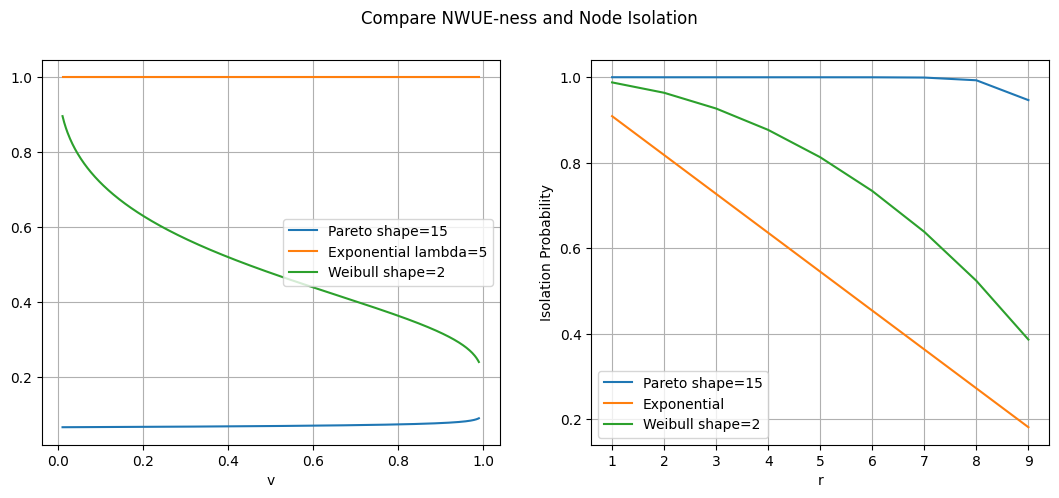

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Compare NWUE-ness and Node Isolation')
ax1.plot(v, fraction_of_mean_residue_lifetime(pareto_dist), label=f'Pareto shape={pareto_shape}')
ax1.plot(v, fraction_of_mean_residue_lifetime(expon_dist), label=f'Exponential lambda={expon_lambda}')
ax1.plot(v, fraction_of_mean_residue_lifetime(weibull_dist), label=f'Weibull shape={weibull_shape}')
ax1.legend()
ax1.grid(True)
ax1.set_xlabel('v')

k = 10
r = np.arange(1, k)
ax2.plot(r, np.array([general_isolation(k, i, pareto_dist) for i in r]), label=f'Pareto shape={pareto_shape}')
ax2.plot(r, np.array([general_isolation(k, i, expon_dist) for i in r]), label='Exponential')
ax2.plot(r, np.array([general_isolation(k, i, weibull_dist) for i in r]), label=f'Weibull shape={weibull_shape}')
ax2.legend()
ax2.grid(True)
ax2.set_xlabel('r')
ax2.set_ylabel('Isolation Probability')

## Problem 3

<div dir="rtl">
در این سوال می‌خواهیم توزیع‌های بیشتری را مورد بررسی قرار دهیم و ببینیم به ازای K و R مختلف احتمال ایزوله شدنشان چگونه است
</div>

Prove if $X$, $Y$, $T$ are random variables of Pareto, exponential and uniform distribution then $\pi_r(X) < \pi_r(Y) < \pi_r(T)$

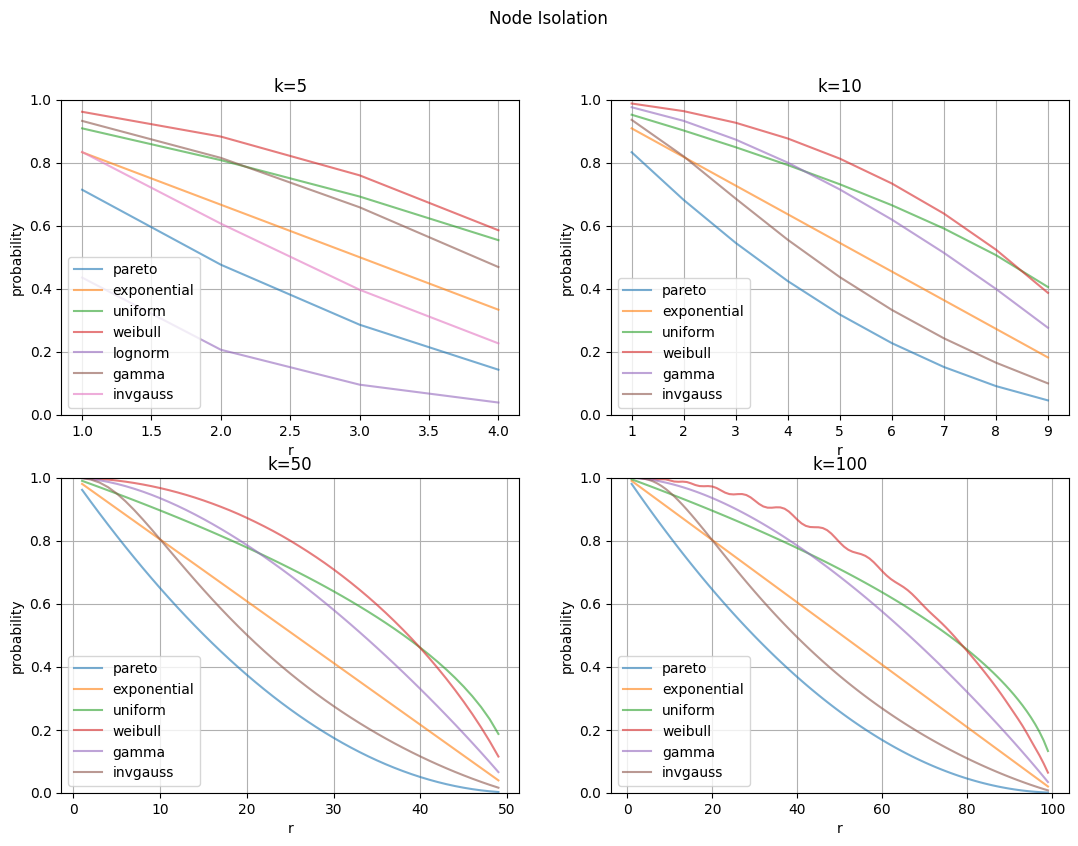

In [11]:
shape = 2.0
color_alpha = 0.6
count_of_neighbors = (5, 10, 50, 100)

def plot_isolation_probabilities(k, axes):
  r = np.arange(1, k)
  axes.plot(r, np.array([pareto_isolation(k, i, shape) for i in r]), alpha=color_alpha, label='pareto')
  axes.plot(r, np.array([exponential_isolation(k, i) for i in r]), alpha=color_alpha, label='exponential')
  axes.plot(r, np.array([uniform_isolation(k, i) for i in r]), alpha=color_alpha, label='uniform')
  axes.plot(r, np.array([general_isolation(k, i, weibull(shape)) for i in r]), alpha=color_alpha, label='weibull')
  # axes.plot(r, np.array([general_isolation(k, i, levy()) for i in r]), alpha=color_alpha, label='levy')
  if k <= 5:
    axes.plot(r, np.array([general_isolation(k, i, lognorm(shape)) for i in r]), alpha=color_alpha, label='lognorm')
  axes.plot(r, np.array([general_isolation(k, i, gamma_dist(shape)) for i in r]), alpha=color_alpha, label='gamma')
  axes.plot(r, np.array([general_isolation(k, i, invgauss(shape)) for i in r]), alpha=color_alpha, label='invgauss')


fig, ax = plt.subplots(2, 2, figsize=(13, 9))
ax = ax.flatten()
fig.suptitle('Node Isolation')
for i, j in zip(ax, count_of_neighbors):
  plot_isolation_probabilities(k=j, axes=i)
  i.legend()
  i.grid(True)
  i.set_title(f'k={j}')
  i.set_xlabel('r')
  i.set_ylabel('probability')
  i.set_ylim(0, 1)

## Find NWUE-ness with Hypothesis Testing

$\begin{aligned} \beta(X)=\int_0^{\infty} \bar{F}^2(t) d t \end{aligned}$

$\begin{aligned} \beta(Y)=\int_0^{\infty} \bar{G}^2(t) d t \end{aligned}$

In [46]:
def beta(dist):
    return integrate.quad(lambda x: np.power(dist.sf(x), 2), 0, np.inf)[0]

$\Delta(X, Y)=\beta(X) / \mu_F-\beta(Y) / \mu_G$

In [47]:
def delta(dist_x, dist_y):
    return beta(dist_x) / dist_x.expect() - beta(dist_y) / dist_y.expect()

$\begin{aligned} S^2\left(X_n, Y_m\right)=\frac{m}{n+m} \cdot \frac{S^2\left(X_n\right)}{\bar{X}^2}+\frac{n}{n+m} \cdot \frac{S^2\left(Y_m\right)}{\bar{Y}^2} \end{aligned}$

In [48]:
def s_2(dist_x, dist_y, n, m):
    return m / (n + m) * dist_x.var() / np.power(dist_x.expect(), 2) + n / (n + m) * dist_y.var() / np.power(dist_y.expect(), 2)

$\begin{aligned} T\left(X_n, Y_m\right)=\sqrt{\frac{n m}{n+m}} \cdot \frac{\Delta\left(X_n, Y_m\right)}{\sqrt{S^2\left(X_n, Y_m\right)}} \end{aligned}$

In [49]:
def T(dist_x, dist_y, n, m):
    return np.sqrt(n * m / (n + m)) * delta(dist_x, dist_y) / np.sqrt(s_2(dist_x, dist_y, n, m))

## Problem 5

Define parameters:

In [50]:
pareto_shape = 20.0
weibull_shape = 20.0
pareto_scale = 10
weibull_scale = 10.7
expon_lambda = 2
expon_scale = 10

pareto_dist = pareto(b=pareto_shape, scale=pareto_scale)
weibull_dist = weibull(c=weibull_shape, scale=weibull_scale)
expon_dist = expon(scale=(1/expon_lambda), loc=expon_scale)

<div dir="rtl">
در این قسمت میانه و میانگین توزیع نشان داده شده. که نشان می‌دهد همه این مقادیر با هم برابر است. سپس دو به دو مقدار T را برای دو توزیع محاسبه کردیم.
</div>

In [51]:
print(f'Pareto Mean: {pareto_dist.expect()}, Pareto Median: {pareto_dist.median()}')
print(f'Weibull Mean: {weibull_dist.expect()}, Weibull Median: {weibull_dist.median()}')
print(f'Exponential Mean: {expon_dist.expect()}, Exponential Median: {expon_dist.median()}')

print(f'T Pareto-Weibull: {T(pareto_dist, weibull_dist, 30, 32)}')
print(f'T Pareto-Exponential: {T(expon_dist, pareto_dist, 30, 32)}')
print(f'T Weibull-Exponential: {T(expon_dist, weibull_dist, 30, 32)}')

Pareto Mean: 10.526315789473706, Pareto Median: 10.352649238413775
Weibull Mean: 10.416495641521697, Weibull Median: 10.505701349205927
Exponential Mean: 10.499999999999982, Exponential Median: 10.346573590279972
T Pareto-Weibull: 0.5776177954266039
T Pareto-Exponential: 0.14372282243713624
T Weibull-Exponential: 0.733152015329698


<div dir="rtl">
در اینجا می‌خواهیم ببینیم با تغییر مقیاس یک توزیع خاصیت NWUE یا مقدار T چگونه تغییر می‌کند.

در اینجا از توزیع پارتو استفاده شده که نشان می‌دهد با تغییر مقیاس آن، مقدار T تغییری نمی‌کند.
</div>

(0.0, 1.0)

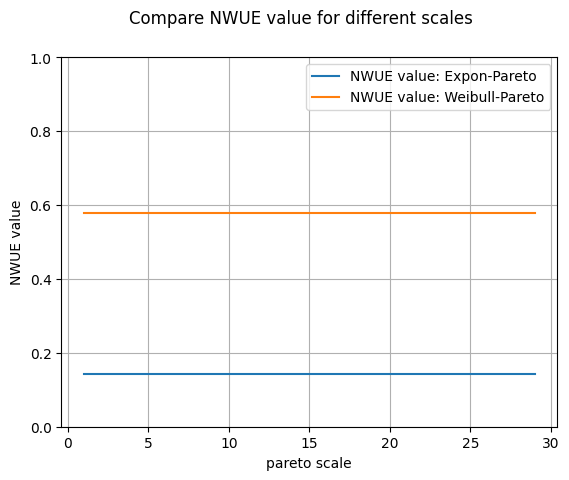

In [20]:
pareto_scale = np.arange(1, 30)
nwue_value_expon_pareto = np.array([T(expon_dist, pareto(b=pareto_shape, scale=i), 30, 32) for i in pareto_scale])
nwue_value_weibull_pareto = np.array([T(pareto(b=pareto_shape, scale=i), weibull_dist, 30, 32) for i in pareto_scale])

fig, ax = plt.subplots(1, 1)
fig.suptitle('Compare NWUE value for different scales')
ax.plot(pareto_scale, nwue_value_expon_pareto, label='NWUE value: Expon-Pareto')
ax.plot(pareto_scale, nwue_value_weibull_pareto, label='NWUE value: Weibull-Pareto')
ax.legend()
ax.grid(True)
ax.set_xlabel('pareto scale')
ax.set_ylabel('NWUE value')
ax.set_ylim(0, 1)

$\left\{\begin{array}{l}H_0: X \sim Y \\ H_A: X \nsim Y\end{array}\right.$

$2 \times \min \{\mathbb{P}\{T \geqslant 0.5\}\}$

## Problem 6

$\begin{aligned} H(u)=\int_0^{F^{-1}(u)} \bar{F}(t) d t \quad u \in(0,1) \end{aligned}$


In [2]:
def H(dist, u):
    return integrate.quad(dist.sf, 0, dist.ppf(u))[0]

### Isolation Probability

(0.0, 1.0)

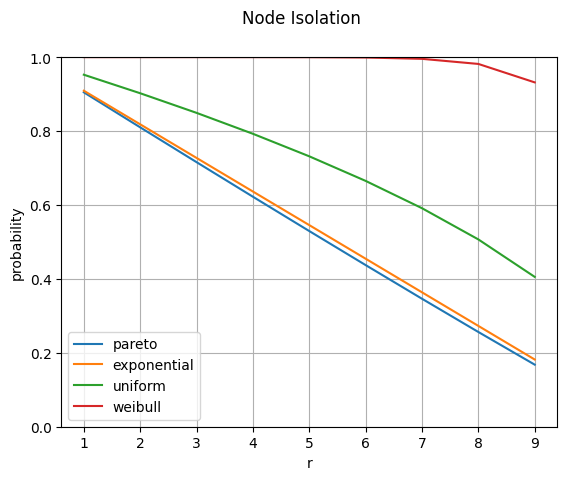

In [12]:
def plot_isolation_probabilities(k, axes):
  r = np.arange(1, k)
  axes.plot(r, np.array([pareto_isolation(k, i, pareto_shape) for i in r]), label='pareto')
  axes.plot(r, np.array([exponential_isolation(k, i) for i in r]), label='exponential')
  axes.plot(r, np.array([uniform_isolation(k, i) for i in r]), label='uniform')
  axes.plot(r, np.array([general_isolation(k, i, weibull_dist) for i in r]), label='weibull')

fig, ax = plt.subplots(1, 1)
fig.suptitle('Node Isolation')
plot_isolation_probabilities(k=10, axes=ax)
ax.legend()
ax.grid(True)
ax.set_xlabel('r')
ax.set_ylabel('probability')
ax.set_ylim(0, 1)

### TTT Plot

Text(0, 0.5, 'H(u)')

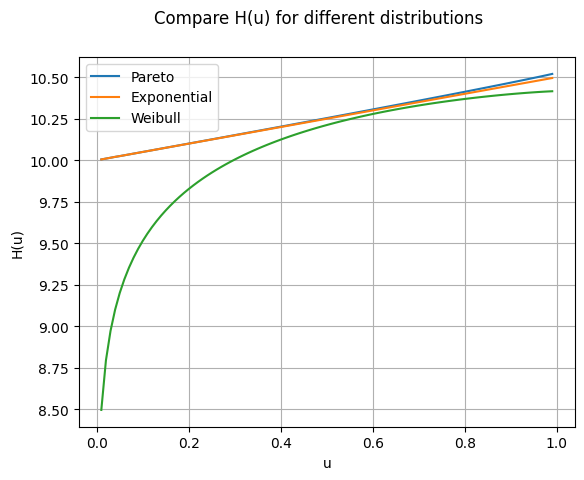

In [7]:
u = np.arange(0.01, 1, 0.01)

fig, ax = plt.subplots(1, 1)
fig.suptitle('Compare H(u) for different distributions')
ax.plot(u, np.array([H(pareto_dist, i) for i in u]), label='Pareto')
ax.plot(u, np.array([H(expon_dist, i) for i in u]), label='Exponential')
ax.plot(u, np.array([H(weibull_dist, i) for i in u]), label='Weibull')
ax.legend()
ax.grid(True)
ax.set_xlabel('u')
ax.set_ylabel('H(u)')